In [134]:
import itertools
import copy

import cv2
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def create_image():
    img = np.zeros( ( 64, 64 ))
    img[16:48, 16:48] = 255
    img[24:40, 24:40] = 0
    noise = np.random.rand(64,64)
    img[ noise < 0.1 ] = 0
    img[ 0.9 < noise ] = 255
    return img

def point_to_index( x, y, w, h ):
    return y * w + x

def index_to_point( index, w, h ):
    y = index // w
    x = index %  w
    return ( x, y )

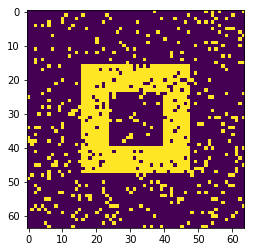

In [135]:
img = create_image()
w,h = img.shape
plt.imshow(img)

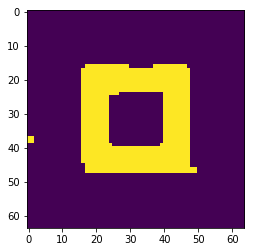

In [136]:
st_cost = 10 
n_cost  = 9

g = nx.DiGraph()
g.add_nodes_from( range( w * h * 1 + 2 ) )
s = w * h
t = s + 1 

for x,y in itertools.product( range( w ), range( h ) ):
    index = point_to_index( x, y, w, h )
    s_cap = 0 if img[y,x] == 0 else st_cost
    t_cap = 0 if img[y,x] == 255 else st_cost
    g.add_edge( s, index, capacity=s_cap )
    g.add_edge( index, t, capacity=t_cap )

    neighbor_x = x + 1
    neighbor_y = y + 1
    if  neighbor_x < w :
        n_cap = 0 if img[y,x] == img[y,neighbor_x] else kappa
        neighbor_index = point_to_index( neighbor_x, y, w, h )
        g.add_edge( index, neighbor_index, capacity=n_cap)
        g.add_edge( neighbor_index, index, capacity=n_cap)
        
    if  neighbor_y < h:
        n_cap = 0 if img[y,x] == img[neighbor_y,x] else kappa
        neighbor_index = point_to_index( x, neighbor_y, w, h )
        g.add_edge( index, neighbor_index, capacity=n_cap)
        g.add_edge( neighbor_index, index, capacity=n_cap)

cut_value, partition = nx.minimum_cut( g, s, t, flow_func=nx.flow.boykov_kolmogorov)
reachable, non_reachable = partition

res = np.zeros(img.shape)
for ind in reachable:
    if ind != s:
        x,y = index_to_point( ind, w, h )
        res[y,x] = 255
plt.imshow(res)
